# Post Test 8 | Deep Learning
#### Nama   : Novia Indah Ramadhani
#### NIM    : 2109106041
#### Kelas  : A2 2021
#### Dataset : Fashion MNIST
#### Link Dataset : https://www.tensorflow.org/datasets/catalog/fashion_mnist

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Klasifikasi Dataset

In [40]:
from tensorflow import keras

# Import Dataset dari Tensorflow
from tensorflow.keras.datasets import fashion_mnist

In [41]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = fashion_mnist.load_data()

## Encoding Label

In [4]:
# Terdapat 10 label
y_train = keras.utils.to_categorical(y_train_raw, 10)
y_test = keras.utils.to_categorical(y_test_raw, 10)

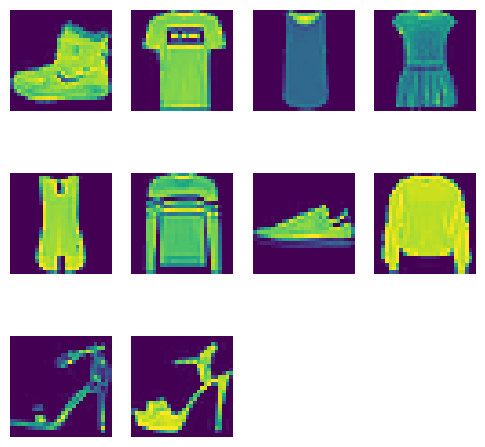

In [5]:
# Menampilkan 10 data pertama dari x_train
plt.figure(figsize=(6,6))
for i in range(10):
    plt.subplot(3,4, i+1)
    plt.imshow(x_train_raw[i])
    plt.axis("off")
plt.show()

In [35]:
# Total gambar terdapat 60.000 pada x train
print(f'Data Train = {x_train_raw.shape}')
print(f'Data Test = {x_test_raw.shape}')

Data Train = (60000, 28, 28)
Data Test = (10000, 28, 28)


## Reshape Gambar

In [36]:
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

## Pembuatan Modeling

In [37]:
model = Sequential()

#### - Input Layer

In [10]:
model.add(
    Dense
    (512, 
     activation = 'relu', 
     input_dim  = 784
    )
)

#### - Hidden Layer

In [11]:
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

#### - Output Layer
-> Menggunakan 10 gambar

In [12]:
model.add(Dense(10, activation='softmax'))

## Model Summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [14]:
model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [15]:
model.fit(
    x_train, 
    y_train, 
    epochs = 9, 
    batch_size = 512, 
    validation_data = (x_test, y_test)
)

Epoch 1/9
118/118 [==============================] - 4s 24ms/step - loss: 8.4569 - accuracy: 0.7257 - val_loss: 1.5515 - val_accuracy: 0.7850
Epoch 2/9
118/118 [==============================] - 2s 20ms/step - loss: 1.1996 - accuracy: 0.8035 - val_loss: 0.9642 - val_accuracy: 0.8184
Epoch 3/9
118/118 [==============================] - 2s 20ms/step - loss: 0.7875 - accuracy: 0.8281 - val_loss: 1.1337 - val_accuracy: 0.7979
Epoch 4/9
118/118 [==============================] - 3s 22ms/step - loss: 0.6484 - accuracy: 0.8394 - val_loss: 0.7574 - val_accuracy: 0.8143
Epoch 5/9
118/118 [==============================] - 3s 21ms/step - loss: 0.5195 - accuracy: 0.8537 - val_loss: 0.6108 - val_accuracy: 0.8415
Epoch 6/9
118/118 [==============================] - 2s 21ms/step - loss: 0.4433 - accuracy: 0.8644 - val_loss: 0.5912 - val_accuracy: 0.8431
Epoch 7/9
118/118 [==============================] - 2s 21ms/step - loss: 0.4001 - accuracy: 0.8722 - val_loss: 0.5719 - val_accuracy: 0.8429
Epoch 

In [16]:
history = model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/9
118/118 [==============================] - 2s 20ms/step - loss: 0.2947 - accuracy: 0.8952 - val_loss: 0.4814 - val_accuracy: 0.8567
Epoch 2/9
118/118 [==============================] - 2s 21ms/step - loss: 0.2811 - accuracy: 0.8993 - val_loss: 0.4795 - val_accuracy: 0.8594
Epoch 3/9
118/118 [==============================] - 2s 21ms/step - loss: 0.2713 - accuracy: 0.9030 - val_loss: 0.4963 - val_accuracy: 0.8537
Epoch 4/9
118/118 [==============================] - 3s 21ms/step - loss: 0.2540 - accuracy: 0.9075 - val_loss: 0.4559 - val_accuracy: 0.8619
Epoch 5/9
118/118 [==============================] - 3s 22ms/step - loss: 0.2371 - accuracy: 0.9126 - val_loss: 0.4776 - val_accuracy: 0.8599
Epoch 6/9
118/118 [==============================] - 2s 20ms/step - loss: 0.2401 - accuracy: 0.9115 - val_loss: 0.5173 - val_accuracy: 0.8478
Epoch 7/9
118/118 [==============================] - 2s 20ms/step - loss: 0.2379 - accuracy: 0.9134 - val_loss: 0.4717 - val_accuracy: 0.8620
Epoch 

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Cek Akurasi

In [19]:
score = model.evaluate(x_test, y_test)
print("AKURASI : ", score[1])
print("LOSS : ", score[0])

313/313 [==============================] - 1s 4ms/step - loss: 0.4824 - accuracy: 0.8606
AKURASI :  0.8605999946594238
LOSS :  0.4824022352695465


## Prediksi

In [20]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [21]:
label = np.argmax(prediction, axis=1)

In [22]:
label_aktual = np.argmax(y_test[1]) # Prediksi gambar ke5 dari Test set

In [23]:
img = x_test[1].reshape(28,28)

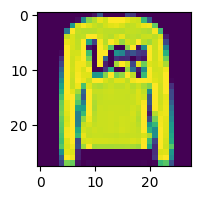

Aktual Label:  2
Label Prediksi:  2


In [24]:
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()
print("Aktual Label: ", label_aktual)
print("Label Prediksi: ", label[1])

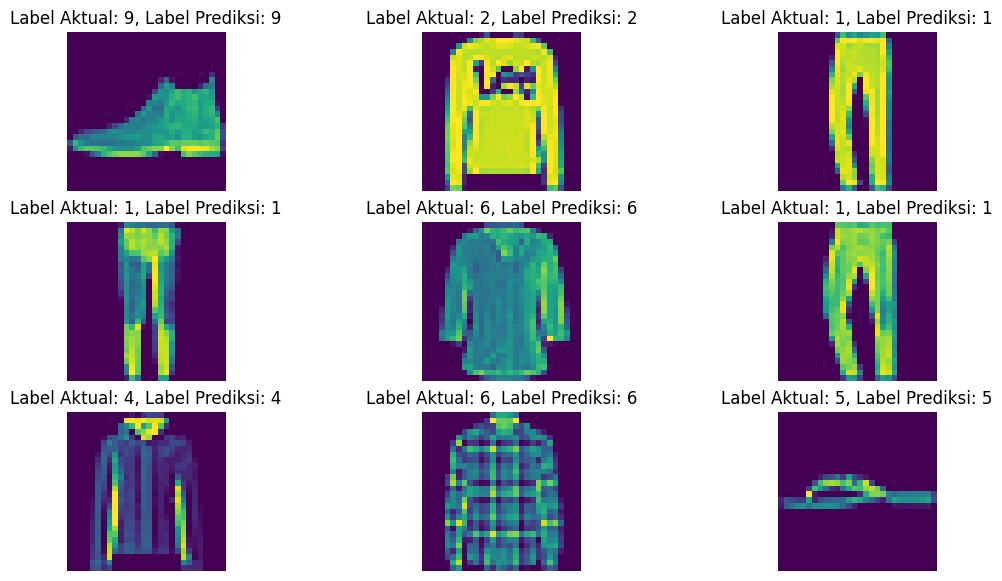

In [25]:
plt.figure(figsize=(13, 7))
for i in range(9):
    plt.subplot(3,3, i+1)
    
    actual_label = np.argmax(y_test[i])
    plt.title(f'Label Aktual: {actual_label}, Label Prediksi: {label[i]}')
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis("off")

plt.show()